In [1]:
import pandas as pd
import re

In [4]:
equat = "3x^5 - 4x"
equat = equat.replace(' ', '')
spliter = re.split("([\+|\-])", equat)
#spliter = re.split("((\d*)(x)\^*\d*)+([\+|\-])*([\+|\-]\d*)", equat)
print(spliter)
out = ""
for w in spliter:
  try:
    if(('x' in w) and len(w) >= 2): #Extramos monomios.
      varPos = w.index('x')
      w = w[:varPos] + "*" +  w[varPos:]
      w = w.replace('^', '**')
      out = out +  '(' + w + ')'
    elif(('x' not in w) and len(w) < 2): #Extraemos numeros sin variable.
      out = out +  w       
  except:
    pass
print(out)
  

['3x^5', '-', '4x']
(3*x**5)-(4*x)


In [5]:
strX = "44"
strX.isdigit()

True

In [2]:
def genFormula(equat):
    equat = equat.replace(' ', '')
    spliter = re.split("([\+|\-])", equat)
    #spliter = re.split("((\d*)(x)\^*\d*)+([\+|\-])*([\+|\-]\d*)", equat)
    #print(spliter)
    out = ""
    for w in spliter:
        try:
            if(('x' in w) and len(w) >= 2): #Extramos monomios.
                varPos = w.index('x')
                w = w[:varPos] + "*" +  w[varPos:]
                w = w.replace('^', '**')
                out = out +  '(' + w + ')'
            elif(('x' not in w)): #Extraemos numeros sin variable.
                out = out +  w       
        except:
            pass
    #print(out)
    return out

In [3]:
#temp = genFormula('4x^2+56x^2-12x')
temp = genFormula('3x^5 - 3x + 12')
print(temp)

(3*x**5)-(3*x)+12


In [4]:
def evaluate_Fx(str_equ, valX):
    strOut = genFormula(str_equ)
    #print(strOut)
    x = valX
    out = eval(strOut)
    return out

In [11]:
out = evaluate_Fx("1x^2", 2)
print(out)

4


In [6]:
def evaluate_derivate_fx(str_equ, x, h):
    strOut = genFormula(str_equ)
    strOut = strOut.replace("x", '(x + h)')
    strOut = "-4*(" + strOut + ")"
    out = eval(strOut)

    strOut = genFormula(str_equ)
    strOut = strOut.replace("x", '(x + 2*h)')
    out = out + eval(strOut)

    strOut = genFormula(str_equ)
    strOut = strOut.replace("x", '(x)')
    strOut = "3*(" + strOut + ")"
    out = out + eval(strOut)

    out = -out/(2*h)

    return out
  

In [9]:
valOut = evaluate_derivate_fx("1x^2", 2, 1e-6) 
print(valOut)


4.00000000144729


In [12]:
def newtonSolverX(x0, strIn, eps):
    xn = x0
    error = 1
    arrayIters = []
    arrayF_x = []
    arrayf_x = []
    arrayXn = []
    arrayErr = []

    i = 0
    h = 0.000001
    while(error > eps):
        F_x = evaluate_Fx(strIn, xn)
        f_x = evaluate_derivate_fx(strIn, xn, h)
        x_n1 = xn - F_x/f_x
        #x_n1 = xn - (evaluate_Fx(f_x, xn)/evaluate_derivate_fx(f_x, xn, h))
        #error = abs(x_n1 - xn)
        error = abs(evaluate_Fx(strIn, xn))
        i = i + 1
        xn = x_n1
        arrayIters.append(i)
        arrayXn.append(xn)
        arrayErr.append(error)
        solution = [i, xn, error]
        arrayF_x.append(F_x)
        arrayf_x.append(f_x)

    print("Finalizo...")
    TableOut = pd.DataFrame({'Iter':arrayIters, 'Xn':arrayXn, 'Error': arrayErr, 'F(x)':arrayF_x, "f'(x)":arrayf_x})
    return TableOut, solution

In [13]:
#-3x^4+5x^3-4x^2-12x
#16x^3-4
ecuacion = input("Ingrese Ecuacion: ")
x0 = int(input("Valor Inicial: "))
tableOut, soluc = newtonSolverX(x0, ecuacion, 0.0000001)

Ingrese Ecuacion: 2x^2
Valor Inicial: 5
Finalizo...


In [14]:
soluc

[16, 7.629394535035034e-05, 4.656612877697997e-08]

In [15]:
tableOut

,Iter,Xn,Error,F(x),f'(x)
0,1,2.500000,5.000000e+01,5.000000e+01,20.000000
1,2,1.250000,1.250000e+01,1.250000e+01,10.000000
2,3,0.625000,3.125000e+00,3.125000e+00,5.000000
3,4,0.312500,7.812500e-01,7.812500e-01,2.500000
4,5,0.156250,1.953125e-01,1.953125e-01,1.250000
5,6,0.078125,4.882813e-02,4.882813e-02,0.625000
6,7,0.039063,1.220703e-02,1.220703e-02,0.312500
7,8,0.019531,3.051758e-03,3.051758e-03,0.156250
8,9,0.009766,7.629395e-04,7.629395e-04,0.078125
9,10,0.004883,1.907349e-04,1.907349e-04,0.039063


In [16]:
xest = soluc[1]
print("solucion: " + str(xest))

solucion: 7.629394535035034e-05


In [17]:
k = []
ek = []
iterX = 0
for xn in tableOut['Xn']:
  ek.append(abs(xn - xest))
  k.append(iterX)
  iterX = iterX + 1

print(ek)

[2.499923706848184, 1.249923706895506, 0.6249237063640555, 0.31242370623710813, 0.1561737061320011, 0.07804870609332538, 0.03898620607398751, 0.01945495606431858, 0.009689331059511221, 0.00480651855707366, 0.0023651123058616545, 0.001144409180255652, 0.0005340576174524391, 0.0002288818360510444, 7.629394535035364e-05, 0.0]


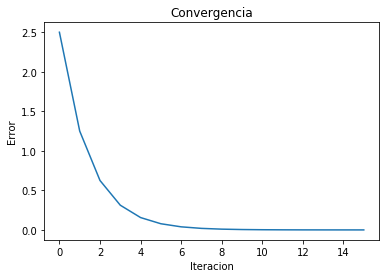

In [19]:
import matplotlib.pyplot as plt

plt.plot(k, ek)
plt.title("Convergencia")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.show()


In [20]:
k = []
ek1 = ek[0:len(ek)-3]
ek1

[2.499923706848184,
 1.249923706895506,
 0.6249237063640555,
 0.31242370623710813,
 0.1561737061320011,
 0.07804870609332538,
 0.03898620607398751,
 0.01945495606431858,
 0.009689331059511221,
 0.00480651855707366,
 0.0023651123058616545,
 0.001144409180255652,
 0.0005340576174524391]

In [21]:
ek = ek[1:len(ek)-2]
ek

[1.249923706895506,
 0.6249237063640555,
 0.31242370623710813,
 0.1561737061320011,
 0.07804870609332538,
 0.03898620607398751,
 0.01945495606431858,
 0.009689331059511221,
 0.00480651855707366,
 0.0023651123058616545,
 0.001144409180255652,
 0.0005340576174524391,
 0.0002288818360510444]

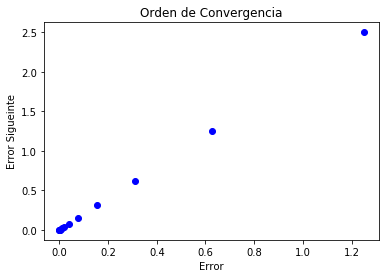

In [22]:
plt.plot(ek, ek1, 'bo')
plt.title("Orden de Convergencia")
plt.xlabel("Error")
plt.ylabel("Error Sigueinte")
plt.show()

In [23]:
import numpy as np
import sys

my_y = np.array(ek).reshape(1, -1)
my_y

array([[1.24992371e+00, 6.24923706e-01, 3.12423706e-01, 1.56173706e-01,
        7.80487061e-02, 3.89862061e-02, 1.94549561e-02, 9.68933106e-03,
        4.80651856e-03, 2.36511231e-03, 1.14440918e-03, 5.34057617e-04,
        2.28881836e-04]])

In [24]:
my_x = np.array(ek1).reshape(1, -1)
my_x

array([[2.49992371e+00, 1.24992371e+00, 6.24923706e-01, 3.12423706e-01,
        1.56173706e-01, 7.80487061e-02, 3.89862061e-02, 1.94549561e-02,
        9.68933106e-03, 4.80651856e-03, 2.36511231e-03, 1.14440918e-03,
        5.34057617e-04]])

In [25]:
new_x = np.log(my_x)
new_x

array([[ 0.91626021,  0.22308251, -0.47012571, -1.16339498, -1.85678639,
        -2.55042221, -3.24454739, -3.93965343, -4.63672989, -5.33778225,
        -6.04692977, -6.77286677, -7.53500683]])

In [26]:
new_y = np.log(my_y)
new_y

array([[ 0.22308251, -0.47012571, -1.16339498, -1.85678639, -2.55042221,
        -3.24454739, -3.93965343, -4.63672989, -5.33778225, -6.04692977,
        -6.77286677, -7.53500683, -8.38230469]])

In [27]:
dfData = pd.DataFrame({'X' : new_x[0,:], 'Y':new_y[0,:]})
dfData

,X,Y
0,0.916260,0.223083
1,0.223083,-0.470126
2,-0.470126,-1.163395
3,-1.163395,-1.856786
4,-1.856786,-2.550422
5,-2.550422,-3.244547
6,-3.244547,-3.939653
7,-3.939653,-4.636730
8,-4.636730,-5.337782
9,-5.337782,-6.046930


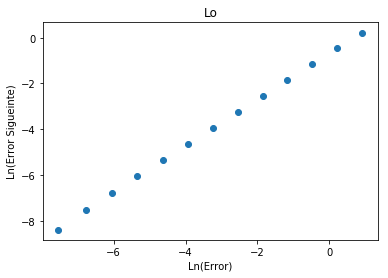

In [28]:
plt.scatter(new_x, new_y)
plt.title("Lo")
plt.xlabel("Ln(Error)")
plt.ylabel("Ln(Error Sigueinte)")
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()  #objeto para manejar regresion lineal
modelo.fit(dfData[['X']], dfData[['Y']])  #creamos modelo X y 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
modelo.coef_

array([[1.0116055]])

In [31]:
interceptB = modelo.intercept_
interceptB

array([-0.67740912])

In [32]:
np.exp(interceptB)

array([0.50793128])